# LRGB - Bag of words

## Load data

In [1]:
from skfp.datasets.lrgb import load_lrgb_mol_benchmark, load_lrgb_mol_splits

_, df = next(load_lrgb_mol_benchmark(as_frames=True))
df

,SMILES,aminoseq,antifungal,cell_cell_communication,anticancer,drug_delivery_vehicle,antimicrobial,antiviral,antihypertensive,antibacterial,antiparasitic,toxic
0,CC(C)C[C@H](NC(=O)[C@H](CCCC[NH3+])NC(=O)[C@@H...,VKLkVyPLKVKLyP,0,0,0,0,1,0,0,0,0,1
1,CC[C@H](C)[C@H](NC(=O)CNC(=O)[C@H](Cc1c[nH]cn1...,DVAHGILNEAYRKVLDQLSAGKHLQSLVARGVGGSLGGGAGDDAEPLS,0,1,0,0,0,0,0,0,0,0
2,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](CCCN...,FAVGLRAIKRALKKLRRGVRKVAKDL,0,0,1,0,0,0,0,0,0,0
3,CC[C@H](C)[C@@H]1NC(=O)[C@@H]2CSSC[C@H](NC(=O)...,AVCNLARCQLSCASLGLLGKCIGDKCECVKH,0,0,0,0,0,0,0,0,0,1
4,CC[C@H](C)[C@H](NC(=O)[C@@H]1CCCN1C(=O)[C@H](C...,GKPRPYSPRPTSHPRPIRV,0,0,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15530,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H]...,DKLIGSCVWGAVNYTSNCNAECKRRGYKGGHCGSFANINCWCET,1,0,0,0,1,0,0,0,0,0
15531,C[C@H](N)C(=O)N[C@@H](Cc1ccccc1)C(=O)N1CCC[C@H...,AFP,0,0,0,0,0,0,1,0,0,0
15532,CC(C)C[C@H](NC(=O)CNC(=O)[C@H](CCC(N)=O)NC(=O)...,HSDGTFTSELSRLQDSARLQRLLQGLV,0,1,0,0,0,0,0,0,0,0
15533,CC[C@H](C)[C@H](N)C(=O)N[C@@H](CC(C)C)C(=O)N1C...,ILPFKFPFPFRR,0,0,0,0,1,0,0,0,0,1


In [2]:
label_names = df.columns[2:].tolist()
label_names

['antifungal',
 'cell_cell_communication',
 'anticancer',
 'drug_delivery_vehicle',
 'antimicrobial',
 'antiviral',
 'antihypertensive',
 'antibacterial',
 'antiparasitic',
 'toxic']

In [3]:
sequences = df['aminoseq'].tolist()
labels = df.iloc[:, 2:].values
sequences[0], labels[0].tolist()

('VKLkVyPLKVKLyP', [0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

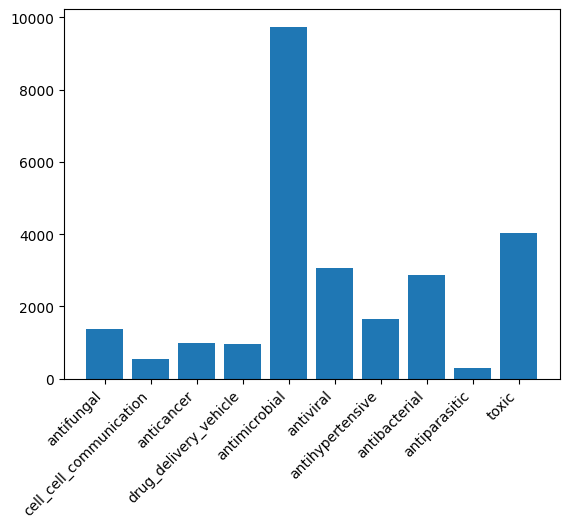

In [4]:
import matplotlib.pyplot as plt
plt.bar(label_names, labels.sum(axis=0))
plt.xticks(rotation=45, ha='right')
plt.show()

In [5]:
splits = load_lrgb_mol_splits(dataset_name='Peptides-func', as_dict=True)
splits.keys()

dict_keys(['train', 'valid', 'test'])

In [6]:
train_sequences = []
test_sequences = []
y_train = []
y_test = []
for i in splits['train']:
    train_sequences.append(sequences[i])
    y_train.append(labels[i])
for i in splits['test']:
    test_sequences.append(sequences[i])
    y_test.append(labels[i])

print("Size of test set:", len(test_sequences) / (len(test_sequences) + len(train_sequences)))

Size of test set: 0.17653741290518024


## Bag of words

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
X_train = vectorizer.fit_transform(train_sequences).toarray()
X_test = vectorizer.transform(test_sequences).toarray()
X_train.shape

(10873, 8608)

## Train

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=2000, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=42)

In [9]:
from skfp.metrics import multioutput_auprc_score, extract_multioutput_pos_proba

y_pred = extract_multioutput_pos_proba(clf.predict_proba(X_test))

print(multioutput_auprc_score(y_test, y_pred))

0.700089235334907


The SOTA is 71% (with public code) and 74% (with unpublished code).